In [1]:
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Случайный вектор $ \xi = (\xi_1 , \xi_2) $ ~ $ N(\alpha , \Sigma) $ <br>
<br>
$ a = 0,  \Sigma = \begin{pmatrix} 10 & 8 \\ 8 & 10 \end{pmatrix} $

In [2]:
distr = sps.multivariate_normal([0, 0], [[10, 8], [8, 10]])

Рассмотрим плотность этого случайного вектора

In [14]:
grid = np.mgrid[-8:8:0.05, -8:8:0.05]
density = [[distr.pdf((grid[0][i][j], grid[1][i][j])) 
            for j in range(grid[0].shape[1])]
            for i in range(grid[0].shape[0])]
density = np.array(density)

Построим график плотности

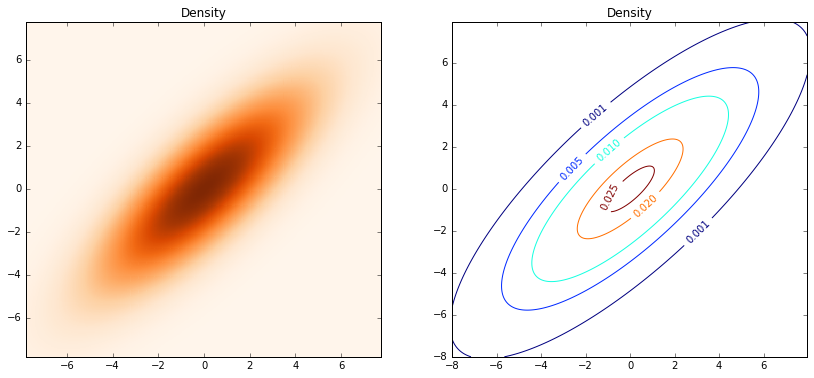

In [31]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.xlim((np.min(grid[0]) + 0.2, np.max(grid[0]) - 0.2))
plt.ylim((np.min(grid[1]) + 0.2, np.max(grid[1]) - 0.2))
plt.title('Density')

plt.subplot(1, 2, 2)
plt.clabel(plt.contour(grid[0], grid[1], density, [0.001, 0.005, 0.01, 0.02, 0.025]))
plt.xlim((np.min(grid[0]), np.max(grid[0])))
plt.ylim((np.min(grid[1]), np.max(grid[1])))
plt.title('Density')

plt.show()

Функция для построения графика плотности условного рапределения  $ f_{{\xi_1}|{\xi_2}}(x|y) $ при разных значениях y.

In [45]:
def cond_dens(y):
    #Гененрируем сетку
    step = 0.01
    x = np.arange(-10, 10, step)
    
    #В каждой точке сетки считаем значение условного распределения
    dens_val = np.array([distr.pdf((x[i], y)) for i in range(len(x))])
    dens_val /= np.sum(dens_val) * step  # Делим на вероятность xi_2 = y
    
    #Построение графика
    plt.figure(figsize=(15, 5))
    plt.plot(x, dens_val)
    plt.ylabel('density')
    plt.title('$ f_{{\\xi_1}|{\\xi_2}}(x | y = %s) $' % (y))
    plt.show()

Строим графики плотности для значений y {-3, 0, 1, 5}

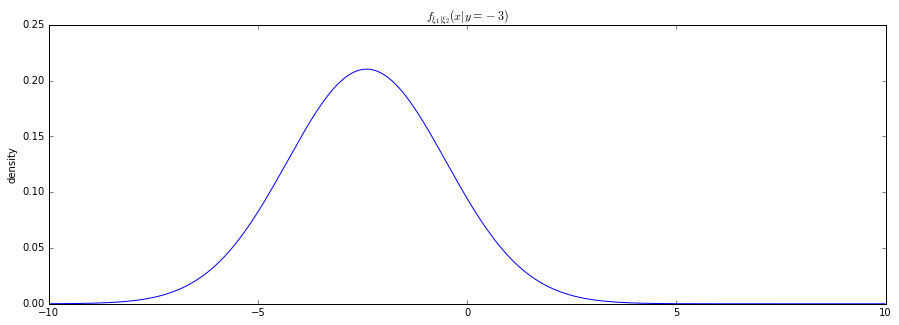

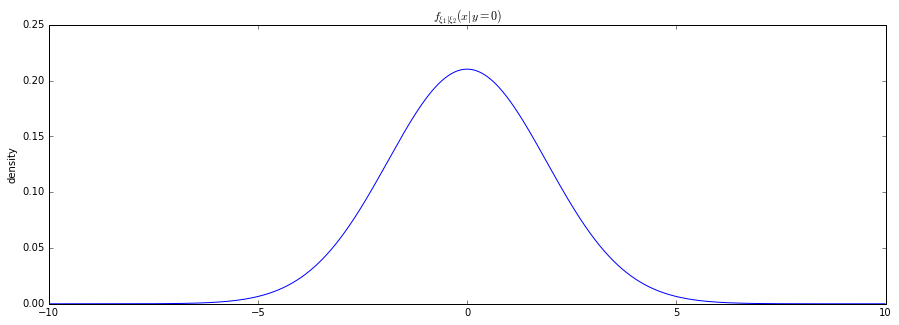

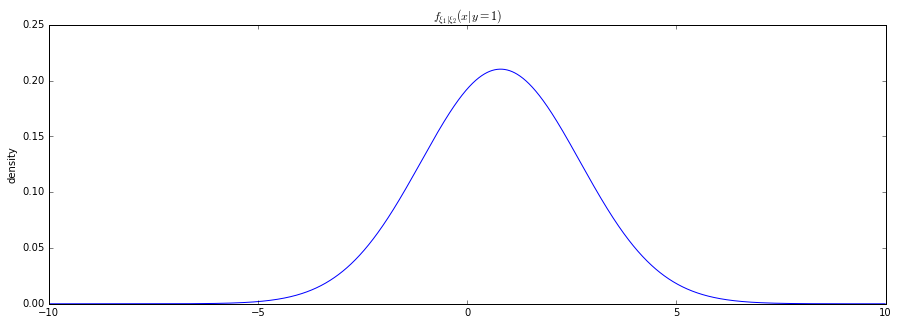

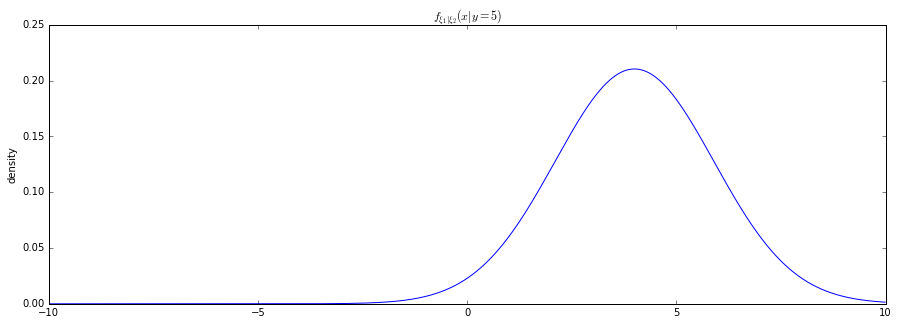

In [46]:
for y in [-3, 0, 1, 5] :
    cond_dens(y)

Функция считающая $ E(\xi_1|\xi_2 = y) $

In [49]:
def cond_mean(y): 
    
    step = 0.01
    grid = np.arange(-10, 10, step)
    
    mean = np.sum([distr.pdf((x, y)) * step * x for x in grid]) \
         / np.sum([distr.pdf((x, y)) * step for x in grid])  
        
    return mean
vect_cond_mean = np.vectorize(cond_mean)

Строим график $ E(\xi_1|\xi_2 = y) $ 

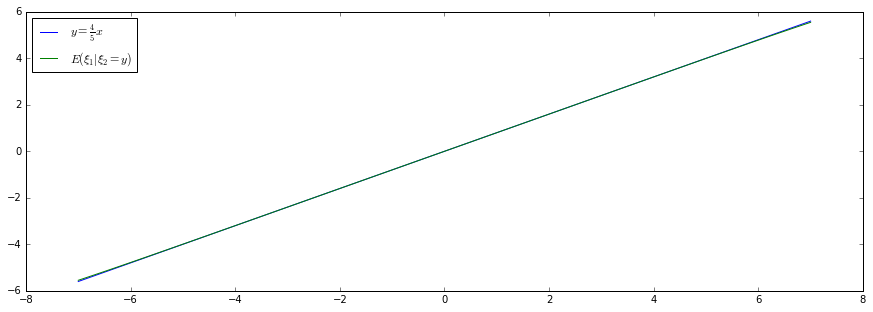

In [52]:
grid = np.linspace(-7, 7)
exp = 4./5 * grid
real = vect_cond_mean(grid)
plt.figure(figsize = (15, 5))
plt.plot(grid, exp, label='$ y=\\frac{4}{5}x $') #
plt.plot(grid, real, label='$ E(\\xi_1|\\xi_2 = y) $')
plt.legend(loc='best')
plt.show()

Вывод: $ E(\xi_1|\xi_2 = y) = \frac{4}{5}y $

График $ x = E\xi_1 $ - $ прямая $ $  y = 0 $ $ => $ строить его нет смысла